# Depression Detection in Tweets

In [3]:

import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

# Data Preparation

In [4]:
df1=pd.read_csv("./data/worthless.csv")
df1.columns=["time","tweet","user","location"]

df2=pd.read_csv("./data/tears.csv")
df2.columns=["time","tweet","user","location"]

df3=pd.read_csv("./data/stuck.csv")
df3.columns=["time","tweet","user","location"]

df4=pd.read_csv("./data/sad.csv")
df4.columns=["time","tweet","user","location"]

df5=pd.read_csv("./data/panic.csv")
df5.columns=["time","tweet","user","location"]

df6=pd.read_csv("./data/misery.csv")
df6.columns=["time","tweet","user","location"]

df7=pd.read_csv("./data/lost.csv")
df7.columns=["time","tweet","user","location"]

df8=pd.read_csv("./data/insecure.csv")
df8.columns=["time","tweet","user","location"]

# df9=pd.read_csv("data/hurt.csv")
# df9.columns=["time","tweet","user","location"]

df10=pd.read_csv("./data/hopeless.csv")
df10.columns=["time","tweet","user","location"]

df11=pd.read_csv("./data/helpless.csv")
df11.columns=["time","tweet","user","location"]

df12=pd.read_csv("./data/despair.csv")
df12.columns=["time","tweet","user","location"]

df13=pd.read_csv("./data/depressing.csv")
df13.columns=["time","tweet","user","location"]

df14=pd.read_csv("./data/depressed.csv")
df14.columns=["time","tweet","user","location"]

df15=pd.read_csv("./data/alone.csv")
df15.columns=["time","tweet","user","location"]

In [5]:

df = pd.concat([df1, df2,df3,df4,df5,df7,df8,df10,df11,df12,df13,df14,df15], axis=0)
df.sample(25)

,time,tweet,user,location
91,2022-09-20 02:06:56+00:00,b'#Alone @snevets_nalyd @stevebrodt https://t.co/S1IsNp4wXW\nThat was a great lamp\xf0\x9f\x92\xa1',b'1Toyasimp14',b''
105,2022-10-06 10:08:52,b'@flipkartsupport @FlipkartStories @_sachinbansal @_Kalyan_K @FlipkartStories why #FlipkartBigBillionDays is doing s\xe2\x80\xa6 https://t.co/KKaTNmd1Do',b'DINESHS97086561',b''
36,2022-10-11 19:08:46,"b""I'm live on #trovo, come tell me about all the #foods for #tabletalktuesday!! We chillin', #dancing out, playing\xe2\x80\xa6 https://t.co/VMzQYZhK1o""",b'KaTapillar83',"b'Tacoma, WA'"
504,2022-10-06 04:00:56+00:00,"b""12 AM EST Reminder: You are ok. You are safe. Don't panic. #anxiety #calm #panic""",b'CalmReminder',b'United States'
312,2022-09-20 17:28:33+00:00,b'It\xe2\x80\x99s really difficult to deal with a break up\xf0\x9f\x98\x94 and I don even know if we broke up. #sad https://t.co/sZeUOvdrYK https://t.co/kKY4G9OoAr',b'Hirma__m',b'Republic of Mozambique'
162,2022-10-07 15:43:13+00:00,b'@AmitAryaMD The #Panic will never be \xe2\x80\x9cover\xe2\x80\x9d until #Scaremongers cease pretending that something scary is occurring.\xe2\x80\xa6 https://t.co/016Lwwzzm9',b'OnlyAsking3',b'Here'
193,2022-10-10 03:44:15,b'@LaTishaMScott ain\xe2\x80\x99t no way no man husband or not gone make me walk away from anyone arguing with my mom!!!! You ar\xe2\x80\xa6 https://t.co/TkyGFqJD3V',b'Zahirrah1',b'United States'
363,2022-09-16 02:29:03+00:00,"b""I'm done trying, I honestly just give up I'm so tired #depressed #anxiety #tired https://t.co/RmhiQxpDIe""",b'X_Kimberlyy_',b''
324,2022-10-06 17:00:25+00:00,"b""#Chronicpain turned me into a #master of holding back #tears \xf0\x9f\x98\xa2 If I #cried over every #pain, I'd never stop. https://t.co/ve5MHyaTdx""",b'TheDisabledDiva',b'Southern California'
34,2022-10-09 20:21:58,b'Hey @NFL - Any reaction for poor performance &amp; gross incompetence? That met no definition of Roughing/Unnecessary\xe2\x80\xa6 https://t.co/J6NwAnqo8o',b'SwamiDaveSays',"b'Cumming, GA'"


In [6]:
df.shape

(5404, 4)

In [7]:
df.drop(['user','time','location'],axis = 1,inplace = True)
df.head()

,tweet
0,b'@laurenboebert How bout getting a fucking pro gun/ anti security state bill through Congress for once? Enough wit\xe2\x80\xa6 https://t.co/OgikovyYuj'
1,b'@laurenboebert And this has what to do with Colorado?? #worthless'
2,b'Russia\xe2\x80\x99s activities in Ukraine show the uselessness of the United Nations. #UkraineRussianWar #UnitedNations #worthless'
3,b'I am so hurt and any support is desperately needed and would mean everything. #Victims beat ourselves up worse than\xe2\x80\xa6 https://t.co/nJJPM6lndm'
4,b'Favorite #Bible Verses\xe2\x80\x94a Comparison of Philippians 3:7-9 in four translations https://t.co/qhPxQ1fBbb #Valuable\xe2\x80\xa6 https://t.co/QcK8RtOB7W'


# Data Cleaning

In [8]:

df['Clean_TweetText'] = df['tweet'].str.replace("@", "") 
df.head()

,tweet,Clean_TweetText
0,b'@laurenboebert How bout getting a fucking pro gun/ anti security state bill through Congress for once? Enough wit\xe2\x80\xa6 https://t.co/OgikovyYuj',b'laurenboebert How bout getting a fucking pro gun/ anti security state bill through Congress for once? Enough wit\xe2\x80\xa6 https://t.co/OgikovyYuj'
1,b'@laurenboebert And this has what to do with Colorado?? #worthless',b'laurenboebert And this has what to do with Colorado?? #worthless'
2,b'Russia\xe2\x80\x99s activities in Ukraine show the uselessness of the United Nations. #UkraineRussianWar #UnitedNations #worthless',b'Russia\xe2\x80\x99s activities in Ukraine show the uselessness of the United Nations. #UkraineRussianWar #UnitedNations #worthless'
3,b'I am so hurt and any support is desperately needed and would mean everything. #Victims beat ourselves up worse than\xe2\x80\xa6 https://t.co/nJJPM6lndm',b'I am so hurt and any support is desperately needed and would mean everything. #Victims beat ourselves up worse than\xe2\x80\xa6 https://t.co/nJJPM6lndm'
4,b'Favorite #Bible Verses\xe2\x80\x94a Comparison of Philippians 3:7-9 in four translations https://t.co/qhPxQ1fBbb #Valuable\xe2\x80\xa6 https://t.co/QcK8RtOB7W',b'Favorite #Bible Verses\xe2\x80\x94a Comparison of Philippians 3:7-9 in four translations https://t.co/qhPxQ1fBbb #Valuable\xe2\x80\xa6 https://t.co/QcK8RtOB7W'


In [9]:

df['Clean_TweetText'] = df['Clean_TweetText'].str.replace(r"http\S+", "") 
df.head()

,tweet,Clean_TweetText
0,b'@laurenboebert How bout getting a fucking pro gun/ anti security state bill through Congress for once? Enough wit\xe2\x80\xa6 https://t.co/OgikovyYuj',b'laurenboebert How bout getting a fucking pro gun/ anti security state bill through Congress for once? Enough wit\xe2\x80\xa6
1,b'@laurenboebert And this has what to do with Colorado?? #worthless',b'laurenboebert And this has what to do with Colorado?? #worthless'
2,b'Russia\xe2\x80\x99s activities in Ukraine show the uselessness of the United Nations. #UkraineRussianWar #UnitedNations #worthless',b'Russia\xe2\x80\x99s activities in Ukraine show the uselessness of the United Nations. #UkraineRussianWar #UnitedNations #worthless'
3,b'I am so hurt and any support is desperately needed and would mean everything. #Victims beat ourselves up worse than\xe2\x80\xa6 https://t.co/nJJPM6lndm',b'I am so hurt and any support is desperately needed and would mean everything. #Victims beat ourselves up worse than\xe2\x80\xa6
4,b'Favorite #Bible Verses\xe2\x80\x94a Comparison of Philippians 3:7-9 in four translations https://t.co/qhPxQ1fBbb #Valuable\xe2\x80\xa6 https://t.co/QcK8RtOB7W',b'Favorite #Bible Verses\xe2\x80\x94a Comparison of Philippians 3:7-9 in four translations #Valuable\xe2\x80\xa6


In [10]:
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
df.head()

,tweet,Clean_TweetText
0,b'@laurenboebert How bout getting a fucking pro gun/ anti security state bill through Congress for once? Enough wit\xe2\x80\xa6 https://t.co/OgikovyYuj',b laurenboebert How bout getting a fucking pro gun anti security state bill through Congress for once Enough wit xe x xa
1,b'@laurenboebert And this has what to do with Colorado?? #worthless',b laurenboebert And this has what to do with Colorado worthless
2,b'Russia\xe2\x80\x99s activities in Ukraine show the uselessness of the United Nations. #UkraineRussianWar #UnitedNations #worthless',b Russia xe x x s activities in Ukraine show the uselessness of the United Nations UkraineRussianWar UnitedNations worthless
3,b'I am so hurt and any support is desperately needed and would mean everything. #Victims beat ourselves up worse than\xe2\x80\xa6 https://t.co/nJJPM6lndm',b I am so hurt and any support is desperately needed and would mean everything Victims beat ourselves up worse than xe x xa
4,b'Favorite #Bible Verses\xe2\x80\x94a Comparison of Philippians 3:7-9 in four translations https://t.co/qhPxQ1fBbb #Valuable\xe2\x80\xa6 https://t.co/QcK8RtOB7W',b Favorite Bible Verses xe x x a Comparison of Philippians in four translations Valuable xe x xa


In [11]:
df1=df.dropna()
df1.drop(['tweet'],axis = 1,inplace = True)
df1.head()

,Clean_TweetText
0,b laurenboebert How bout getting a fucking pro gun anti security state bill through Congress for once Enough wit xe x xa
1,b laurenboebert And this has what to do with Colorado worthless
2,b Russia xe x x s activities in Ukraine show the uselessness of the United Nations UkraineRussianWar UnitedNations worthless
3,b I am so hurt and any support is desperately needed and would mean everything Victims beat ourselves up worse than xe x xa
4,b Favorite Bible Verses xe x x a Comparison of Philippians in four translations Valuable xe x xa


In [12]:
df1.shape

(5080, 1)

In [13]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [15]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df1.head()

,Clean_TweetText
0,b laurenboebert bout getting fucking pro gun anti security state bill congress enough wit xe x xa
1,b laurenboebert colorado worthless
2,b russia xe x x activities ukraine show uselessness united nations ukrainerussianwar unitednations worthless
3,b hurt support desperately needed would mean everything victims beat worse xe x xa
4,b favorite bible verses xe x x comparison philippians four translations valuable xe x xa


In [16]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: x.split())
df1.head()

,Clean_TweetText
0,"[b, laurenboebert, bout, getting, fucking, pro, gun, anti, security, state, bill, congress, enough, wit, xe, x, xa]"
1,"[b, laurenboebert, colorado, worthless]"
2,"[b, russia, xe, x, x, activities, ukraine, show, uselessness, united, nations, ukrainerussianwar, unitednations, worthless]"
3,"[b, hurt, support, desperately, needed, would, mean, everything, victims, beat, worse, xe, x, xa]"
4,"[b, favorite, bible, verses, xe, x, x, comparison, philippians, four, translations, valuable, xe, x, xa]"


In [17]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
df1.head()

,Clean_TweetText
0,"[b, laurenboebert, bout, get, fuck, pro, gun, anti, secur, state, bill, congress, enough, wit, xe, x, xa]"
1,"[b, laurenboebert, colorado, worthless]"
2,"[b, russia, xe, x, x, activ, ukrain, show, useless, unit, nation, ukrainerussianwar, unitedn, worthless]"
3,"[b, hurt, support, desper, need, would, mean, everyth, victim, beat, wors, xe, x, xa]"
4,"[b, favorit, bibl, vers, xe, x, x, comparison, philippian, four, translat, valuabl, xe, x, xa]"


In [18]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
df1.head()

,Clean_TweetText
0,b laurenboebert bout get fuck pro gun anti secur state bill congress enough wit xe x xa
1,b laurenboebert colorado worthless
2,b russia xe x x activ ukrain show useless unit nation ukrainerussianwar unitedn worthless
3,b hurt support desper need would mean everyth victim beat wors xe x xa
4,b favorit bibl vers xe x x comparison philippian four translat valuabl xe x xa


In [19]:
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1.head()

,Clean_TweetText
0,laurenboebert bout fuck anti secur state bill congress enough
1,laurenboebert colorado worthless
2,russia activ ukrain show useless unit nation ukrainerussianwar unitedn worthless
3,hurt support desper need would mean everyth victim beat wors
4,favorit bibl vers comparison philippian four translat valuabl


# Data Visualization

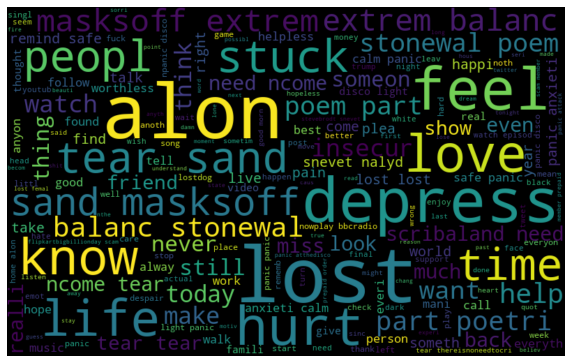

In [20]:
all_words = ' '.join([text for text in df1['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


# Sentiment Analysis

In [21]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df1['polarity'] = df1['Clean_TweetText'].apply(polarity)
df1['subjectivity'] = df1['Clean_TweetText'].apply(subjectivity)

In [22]:
df1.head()

,Clean_TweetText,polarity,subjectivity
0,laurenboebert bout fuck anti secur state bill congress enough,-0.20000,0.55000
1,laurenboebert colorado worthless,-0.80000,0.90000
2,russia activ ukrain show useless unit nation ukrainerussianwar unitedn worthless,-0.65000,0.55000
3,hurt support desper need would mean everyth victim beat wors,-0.19375,0.36875
4,favorit bibl vers comparison philippian four translat valuabl,0.00000,0.00000


Text(0, 0.5, '← Facts — — — — — — — Opinions →')

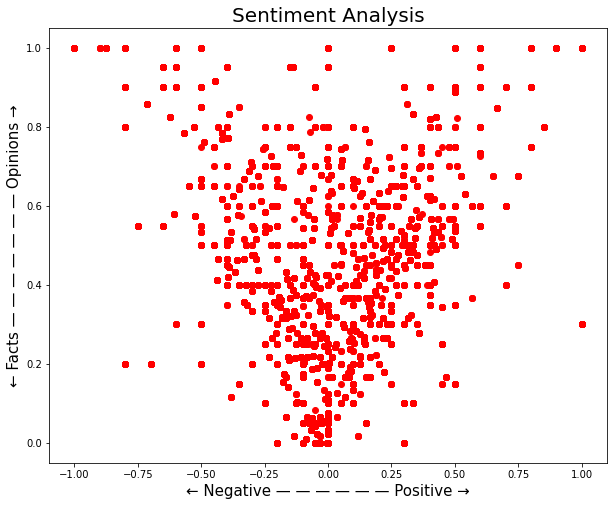

In [23]:
#visualizations

# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df1.index):
    x = df1.polarity.loc[Tweets]
    y = df1.subjectivity.loc[Tweets]
    plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

In [24]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1
df1['analysis'] = df1['polarity'].apply(ratio)

In [25]:
df1.head()

,Clean_TweetText,polarity,subjectivity,analysis
0,laurenboebert bout fuck anti secur state bill congress enough,-0.20000,0.55000,-1
1,laurenboebert colorado worthless,-0.80000,0.90000,-1
2,russia activ ukrain show useless unit nation ukrainerussianwar unitedn worthless,-0.65000,0.55000,-1
3,hurt support desper need would mean everyth victim beat wors,-0.19375,0.36875,-1
4,favorit bibl vers comparison philippian four translat valuabl,0.00000,0.00000,0


In [26]:
df1['analysis'].value_counts()

 0    2972
 1    1135
-1     973
Name: analysis, dtype: int64

In [27]:
df1['analysis'] = df1['analysis'].replace([-1,0,1],[0,1,2])

In [28]:
df1['analysis'].value_counts()

1    2972
2    1135
0     973
Name: analysis, dtype: int64

*here 0 means depressive tweets, 1 means neutral tweets and 2 means positive tweets*

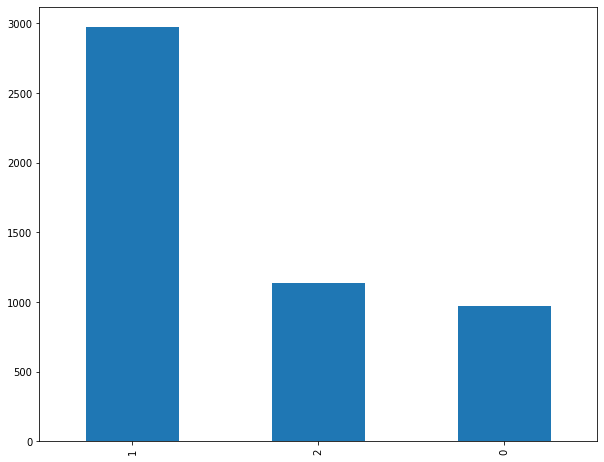

In [29]:
# Plotting
df1['analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Word Clouds

word cloud for positive words

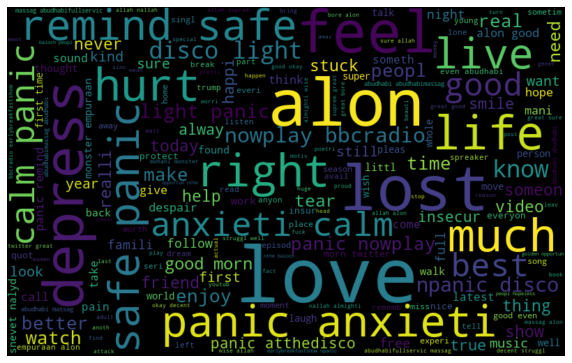

In [30]:
positive_words =' '.join([text for text in df1['Clean_TweetText'][df1['analysis'] == 2]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

word cloud for depressive words

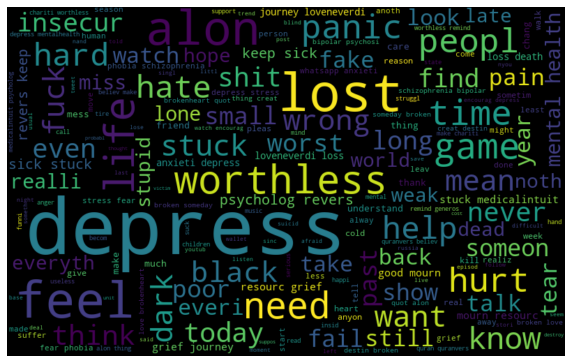

In [31]:
depressive_words =' '.join([text for text in df1['Clean_TweetText'][df1['analysis'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Model Building

In [32]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df1['Clean_TweetText'])
cv.shape

(5080, 9031)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(cv,df1['analysis'] , test_size=.2,stratify=df1['analysis'], random_state=42)

# MODEL TRAINING

# XGBoost Classifier

In [35]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.9301181102362205


In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_xgb))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       195
           1       0.92      0.99      0.95       594
           2       0.94      0.86      0.90       227

    accuracy                           0.93      1016
   macro avg       0.93      0.90      0.91      1016
weighted avg       0.93      0.93      0.93      1016



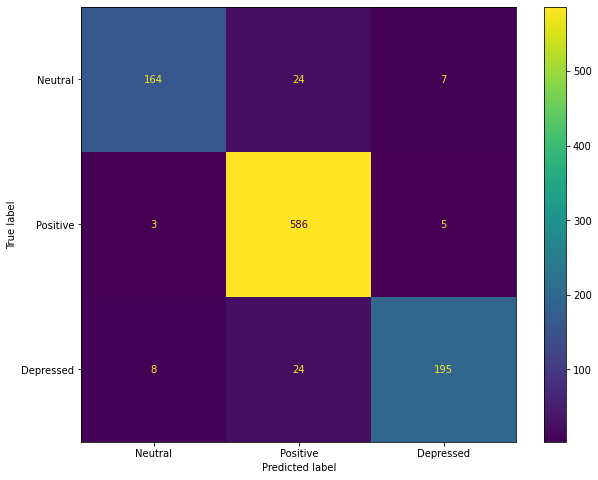

In [37]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_xgb)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Neutral','Positive','Depressed'])
cm_display.plot()
plt.show()

# Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.9281496062992126


In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       195
           1       0.92      0.99      0.96       594
           2       0.95      0.81      0.88       227

    accuracy                           0.93      1016
   macro avg       0.94      0.89      0.91      1016
weighted avg       0.93      0.93      0.93      1016



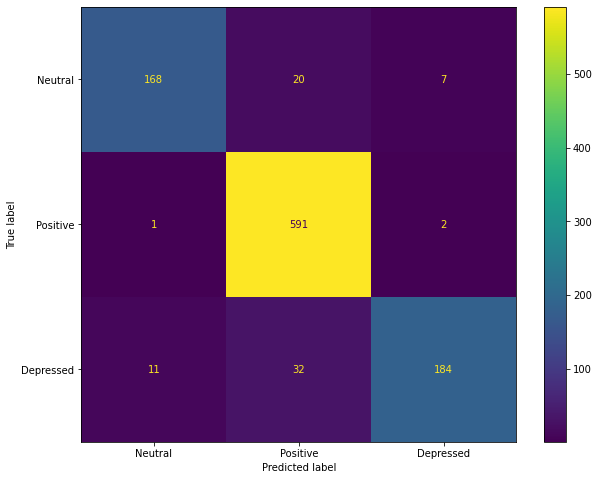

In [40]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_rf)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Neutral','Positive','Depressed'])
cm_display.plot()
plt.show()

# Logistic Regression

In [41]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

0.8976377952755905


In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       195
           1       0.88      0.99      0.93       594
           2       0.94      0.77      0.85       227

    accuracy                           0.90      1016
   macro avg       0.92      0.84      0.87      1016
weighted avg       0.90      0.90      0.89      1016



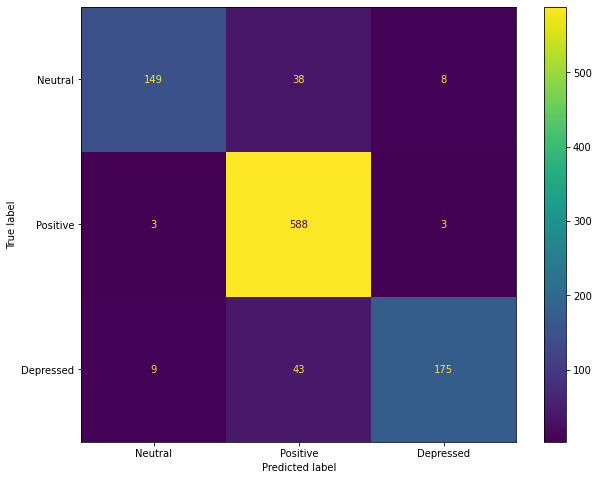

In [43]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_lr)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Neutral','Positive','Depressed'])
cm_display.plot()
plt.show()

# Support Vector Machines (SVM)

In [44]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

0.8395669291338582


In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test,prediction_svc))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74       195
           1       0.80      1.00      0.89       594
           2       0.95      0.61      0.75       227

    accuracy                           0.84      1016
   macro avg       0.89      0.74      0.79      1016
weighted avg       0.86      0.84      0.83      1016



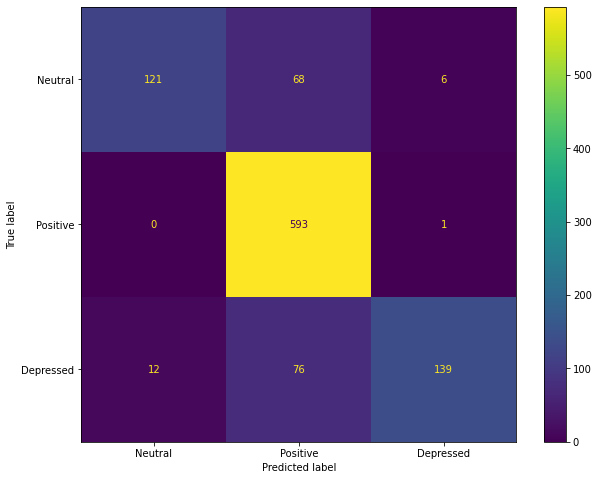

In [48]:
confusion_matrix=metrics.confusion_matrix(y_test,prediction_svc)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['Neutral','Positive','Depressed'])
cm_display.plot()
plt.show()